In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import pandas as pd

In [2]:
"""Data"""

home = '/tudelft.net/staff-umbrella/rootzone/Benchmark_evaporation_products'

CLASS_monthly = xr.open_dataset(home + '/CLASS/CLASS_v1-1_2003-2009.nc' , engine = 'netcdf4')

In [3]:
"""Characteristics"""

print()
print('Dims monthly:' , CLASS_monthly.dims)
print()
print(CLASS_monthly.coords)
print()
#CLASS_monthly.head()


Dims monthly: Frozen({'time': 84, 'lon': 720, 'lat': 360})

Coordinates:
  * time     (time) datetime64[ns] 2003-01-15 2003-02-15 ... 2009-12-15
  * lon      (lon) float64 -179.8 -179.2 -178.8 -178.2 ... 178.8 179.2 179.8
  * lat      (lat) float64 -89.75 -89.25 -88.75 -88.25 ... 88.75 89.25 89.75



In [4]:
"""Weighting"""

phi = np.deg2rad(CLASS_monthly.lat)
weights = np.cos(phi)
CLASS_monthly_weighted = weights * CLASS_monthly.hfls

"""Converting to mm/d"""

labda = 2.45 * 10**6 #MJ kg^-1
rho_w = 1000  #kg m ^-3
t_day = 86400 #seconds
factor = (t_day * 1000)/(rho_w * labda)

"""Removing Antarctica"""

CLASS_monthly_weighted_Ant = CLASS_monthly_weighted[60: , : , :] * factor

"""-60 until 0 degrees"""

CLASS_monthly_weighted_SH  = CLASS_monthly_weighted[60:180 , : , :] * factor

The standard deviation for the 2005 monthly average is: 0.203 mm/d



array([0.72771803, 0.7125675 , 0.87279497, 0.93477956, 0.99120921,
       1.25221543, 1.30929771, 1.21604489, 1.03564255, 0.86419773,
       0.80914376, 0.71768367])

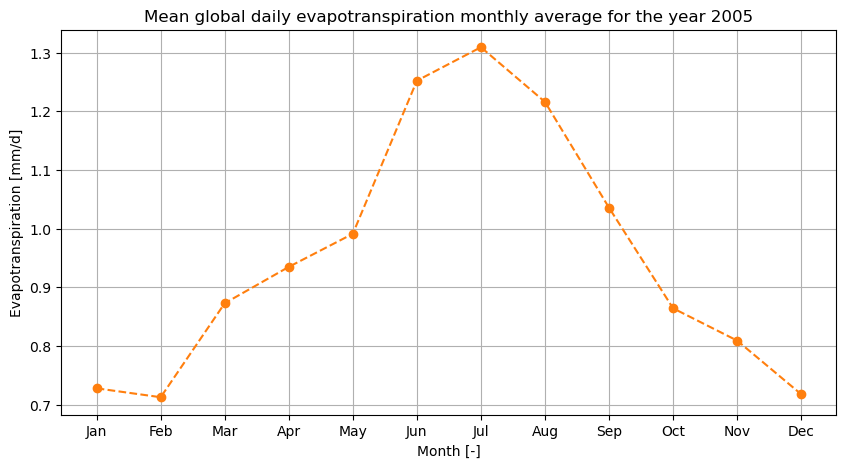

In [5]:
"""Plotting mean"""

Months = ['Jan' , 'Feb' , 'Mar' , 'Apr' , 'May' , 'Jun' , 'Jul' , 'Aug' , 'Sep' , 'Oct' , 'Nov' , 'Dec']
t = 84
m_py = 12

CLASS_monthly_2005 = np.zeros(m_py)

for i in range(m_py):
    CLASS_monthly_2005[i] = CLASS_monthly_weighted_Ant[: , t - 5 * m_py + i  , :].mean()

plt.figure(figsize = ( 10, 5))
plt.title('Mean global daily evapotranspiration monthly average for the year 2005')
plt.plot(np.arange(0 , 12 , 1) , CLASS_monthly_2005 , 'C1o--')
plt.grid()
plt.xlabel('Month [-]')
plt.ylabel('Evapotranspiration [mm/d]')
plt.xticks(np.arange(0 , 12 , 1) , Months);

print(f'The standard deviation for the 2005 monthly average is: {np.std(CLASS_monthly_2005):.3f} mm/d')
print()

CLASS_monthly_2005

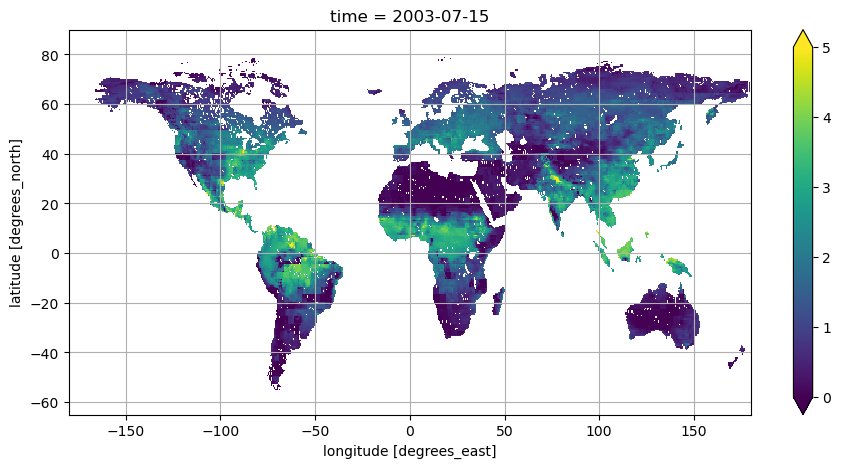

In [6]:
"""plotting map"""

plt.figure(figsize = (11, 5))

CLASS_monthly_weighted_Ant[: , 6 , :].plot(cmap = 'viridis' , vmin = 0 , vmax = 5)
plt.ylim(-65 , 90)
plt.grid()

The standard deviation for the 2005 monthly average is: 0.432 mm/d



array([2.32836297, 2.31788961, 2.34221488, 1.78512584, 1.5227996 ,
       1.29720646, 1.10539385, 1.37173811, 1.38388267, 1.78268899,
       2.08707654, 2.190136  ])

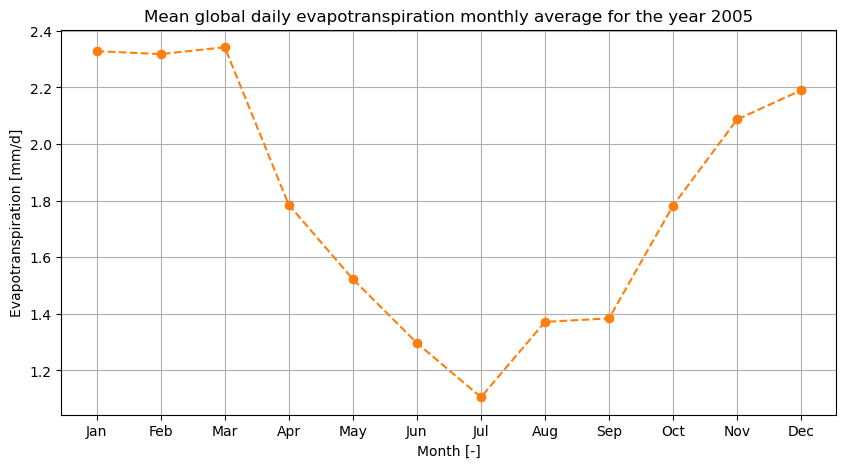

In [7]:
"""Plotting mean (-60 until 0 degrees latitude)"""

Months = ['Jan' , 'Feb' , 'Mar' , 'Apr' , 'May' , 'Jun' , 'Jul' , 'Aug' , 'Sep' , 'Oct' , 'Nov' , 'Dec']
t = 84
m_py = 12

CLASS_monthly_2005 = np.zeros(m_py)

for i in range(m_py):
    CLASS_monthly_2005[i] = CLASS_monthly_weighted_SH[: , t - 5 * m_py + i  , :].mean()

plt.figure(figsize = ( 10, 5))
plt.title('Mean global daily evapotranspiration monthly average for the year 2005')
plt.plot(np.arange(0 , 12 , 1) , CLASS_monthly_2005 , 'C1o--')
plt.grid()
plt.xlabel('Month [-]')
plt.ylabel('Evapotranspiration [mm/d]')
plt.xticks(np.arange(0 , 12 , 1) , Months)

print(f'The standard deviation for the 2005 monthly average is: {np.std(CLASS_monthly_2005):.3f} mm/d')
print();

CLASS_monthly_2005

[0.72871045 0.7765418  0.83749854 0.91797743 1.03683071 1.21948426
 1.29245403 1.22824998 1.04321107 0.89720338 0.77131727 0.7390981 ]

The standard deviation of the timeseries 2003-2009 monthly average is: 0.196 mm/d



array([0.72871045, 0.7765418 , 0.83749854, 0.91797743, 1.03683071,
       1.21948426, 1.29245403, 1.22824998, 1.04321107, 0.89720338,
       0.77131727, 0.7390981 ])

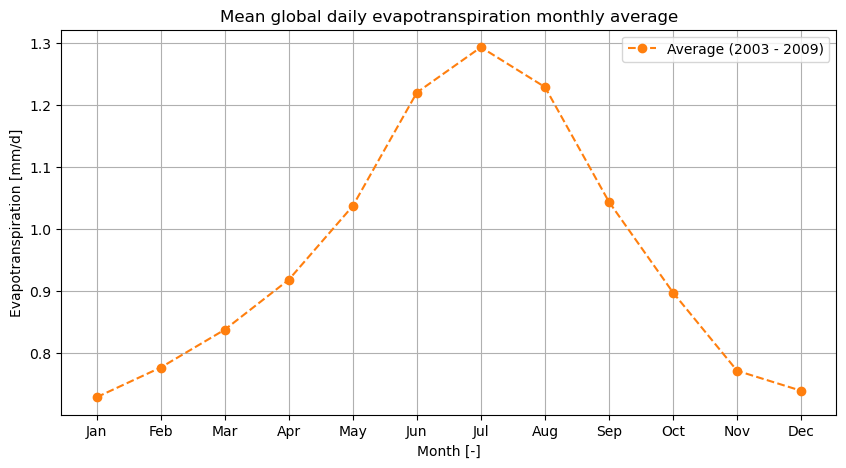

In [8]:
"""For 2003-2009"""

CLASS_monthly_mean = np.zeros(12)
Monthly_mean_all = np.zeros(84)
number_m = np.arange(0 , 12 , 1)

for i in range(len(Monthly_mean_all)):
    Monthly_mean_all[i] = CLASS_monthly_weighted_Ant[: , i , :].mean()

for i in number_m:
    CLASS_monthly_mean[i] = np.mean([Monthly_mean_all[i] , Monthly_mean_all[i + 12] , Monthly_mean_all[i + 24] ,  Monthly_mean_all[i+36] , 
    Monthly_mean_all[i + 48] , Monthly_mean_all[i + 60] , Monthly_mean_all[i + 72]])
    
plt.figure(figsize = ( 10, 5))
plt.title('Mean global daily evapotranspiration monthly average')
plt.plot(np.arange(0 , 12 , 1) , CLASS_monthly_mean , 'C1o--' , label = 'Average (2003 - 2009)')
plt.grid()
plt.xlabel('Month [-]')
plt.ylabel('Evapotranspiration [mm/d]')
plt.xticks(np.arange(0 , 12 , 1) , Months)
plt.legend()

print(CLASS_monthly_mean)
print()
print(f'The standard deviation of the timeseries 2003-2009 monthly average is: {np.std(Monthly_mean_all):.3f} mm/d')
print()

CLASS_monthly_mean

In [ ]:
"""For 2003-2009 (Between -60 and 0 degrees latitude)"""

CLASS_monthly_mean = np.zeros(12)
Monthly_mean_all = np.zeros(84)
number_m = np.arange(0 , 12 , 1)

for i in range(len(Monthly_mean_all)):
    Monthly_mean_all[i] = CLASS_monthly_weighted_SH[: , i , :].mean()

for i in number_m:
    CLASS_monthly_mean[i] = np.mean([Monthly_mean_all[i] , Monthly_mean_all[i + 12] , Monthly_mean_all[i + 24] ,  Monthly_mean_all[i+36] , 
    Monthly_mean_all[i + 48] , Monthly_mean_all[i + 60] , Monthly_mean_all[i + 72]])
    
plt.figure(figsize = ( 10, 5))
plt.title('Mean global daily evapotranspiration monthly average')
plt.plot(np.arange(0 , 12 , 1) , CLASS_monthly_mean , 'C1o--' , label = 'Average (2003 - 2009)')
plt.grid()
plt.xlabel('Month [-]')
plt.ylabel('Evapotranspiration [mm/d]')
plt.xticks(np.arange(0 , 12 , 1) , Months)
plt.legend()

print(CLASS_monthly_mean)
print()
print(f'The standard deviation of the timeseries 2003-2009 monthly average is: {np.std(Monthly_mean_all):.3f} mm/d')
print()